Exercise 3. Rolling a die

If you roll a 6-sided die once, what is the probability of not seeing a 6? 
If you roll a 6-sided die six times, what is the probability of not seeing a 6 on any of those rolls?

Instructions
* Assign the variable p_no6 as the probability of not seeing a 6 on a single roll.
* Then, calculate the probability of not seeing a 6 on six rolls using p_no6.


In [2]:
p_no6 = 5/6

prob_no_6_in_six_rolls = p_no6 ** 6

print(prob_no_6_in_six_rolls)

0.3348979766803842


Exercise 4. Probability the Celtics win a game

Two teams, say the Celtics and the Cavs, are playing a seven game series. The Cavs are a better team and have a 60% chance of winning each game.

What is the probability that the Celtics win at least one game? Remember that the Celtics must win one of the first four games, or the series will be over!


    Calculate the probability that the Cavs will win the first four games of the series.
    Calculate the probability that the Celtics win at least one game in the first four games of the series.


In [3]:
p_win_cav = 0.6
p_cav_win_all_4 = p_win_cav ** 4
p_celtics_at_least_1 = 1 - p_cav_win_all_4

print(p_cav_win_all_4)
print(p_celtics_at_least_1)

0.1296
0.8704000000000001


Exercise 5. Monte Carlo simulation for Celtics winning a game

Create a Monte Carlo simulation to confirm your answer to the previous problem by estimating how frequently the Celtics win at least 1 of 4 games. Use B <- 10000 simulations.

The provided sample code simulates a single series of four random games, simulated_games.
Instructions
100 XP

    Use the replicate function for B <- 10000 simulations of a four game series. The results of replicate should be stored to a variable named celtic_wins.
    Within each simulation, replicate the sample code to simulate a four-game series named simulated_games. Then, use the any function to indicate whether the four-game series contains at least one win for the Celtics. Perform these operations in two separate steps.
    Use the mean function on celtic_wins to find the proportion of simulations that contain at least one win for the Celtics out of four games.


In [1]:
import pyro
import torch

def four_game_series():
    with pyro.plate("4series", 4):
        return pyro.sample("celtics_win", pyro.distributions.Bernoulli(0.4))

B = 10000
count_AtLeastOneWin = 0
for _ in range(B):
    simulated_games = four_game_series()
    if(torch.mean(simulated_games).item() > 0):
        count_AtLeastOneWin += 1

prob_celtics_win = count_AtLeastOneWin / B

print(prob_celtics_win)

0.8671


Part 3

Exercise 1. The Cavs and the Warriors

Two teams, say the Cavs and the Warriors, are playing a seven game championship series. The first to win four games wins the series. The teams are equally good, so they each have a 50-50 chance of winning each game.

If the Cavs lose the first game, what is the probability that they win the series?
Instructions:
* Assign the number of remaining games to the variable n.
* Assign a variable outcomes as a vector of possible outcomes in a single game, where 0 indicates a loss and 1 indicates a win for the Cavs.
* Assign a variable l to a list of all possible outcomes in all remaining games. Use the rep function to create a list of n games, where each game consists of list(outcomes).
* Use the expand.grid function to create a data frame containing all the combinations of possible outcomes of the remaining games.
* Use the rowSums function to identify which combinations of game outcomes result in the Cavs winning the number of games necessary to win the series.
* Use the mean function to calculate the proportion of outcomes that result in the Cavs winning the series and print your answer to the console.


In [1]:
import torch
import pyro
import itertools

def permutations(perms):
    wins = torch.ones(perms)
    losses = torch.zeros(perms)
    options = torch.cat((wins, losses))
    return torch.unique(torch.tensor(list(itertools.permutations(options.tolist(), perms))), dim=0)

def validSeries(all):
    win_counts_per_serie = torch.sum(all_series, 1)
    at_least_3 =  win_counts_per_serie > 2
    at_most_4 = win_counts_per_serie < 5
    combined = at_least_3 & at_most_4
    valid_series_idx = torch.where(combined, torch.ones(1), torch.zeros(1)).nonzero()[:,0]
    return torch.index_select(all, 0, valid_series_idx)

def find_win_series(series):
    win_counts = torch.sum(series, 1)
    
    winning_series = torch.where(win_counts == 4, torch.ones(1), torch.zeros(1)).nonzero()
    return winning_series.size()[0]

all_series = permutations(6)
valid_series = validSeries(all_series)
# correct: 35. 70 would be all but is only half as first game is lost
print(valid_series.size())
winning = find_win_series(valid_series)

print(winning)
win_prob = winning / valid_series.size()[0]
print(win_prob)

torch.Size([35, 6])
15
0.42857142857142855


Exercise 2. The Cavs and the Warriors - Monte Carlo

Confirm the results of the previous question with a Monte Carlo simulation to estimate the probability of the Cavs winning the series after losing the first game.

Instructions
* Use the replicate function to replicate the sample code for B <- 10000 simulations.
* Use the sample function to simulate a series of 6 games with random, independent outcomes of either a loss for the Cavs (0) or a win for the Cavs (1) in that order. Use the default probabilities to sample.
* Use the sum function to determine whether a simulated series contained at least 4 wins for the Cavs.
* Use the mean function to find the proportion of simulations in which the Cavs win at least 4 of the remaining games. Print your answer to the console.


In [19]:
import pyro
import torch

def play_a_game():
    return pyro.sample("game", pyro.distributions.Bernoulli(0.5)).item() == 1.

def play_a_series():
    wins = 0
    for i in range(6):
        won_game = play_a_game()
        if(won_game):
            wins += 1
    
    if(wins == 4):
        return True
    if(wins == 3):
        return False
    
    return play_a_series()

def play_a_series_2():
    series = pyro.ops.stats.resample(torch.tensor([0.,1.]), 6, replacement=True)
    wins = series.nonzero().size()[0]
    if(wins == 3):
        return False
    if(wins == 4):
        return True
    # Ignore a not-possible serie
    return play_a_series_2()
    
B = 10000
won_series = 0
for _ in range(B):
    if(play_a_series()):
        won_series += 1

prob = won_series / B
# value seems to be too low
print(prob)

0.426


Exercise 3. A and B play a series - part 1

Two teams, A
and B, are playing a seven series game series. Team A is better than team B and has a p>0.5

chance of winning each game.

Instructions
* Use the function sapply to compute the probability, call it Pr of winning for p <- seq(0.5, 0.95, 0.025).
    Then plot the result plot(p, Pr).
    
 
 


[0.5, 0.999806421875, 1.2868530273437503e-05]


Text(0, 0.5, 'Series Win Prob')

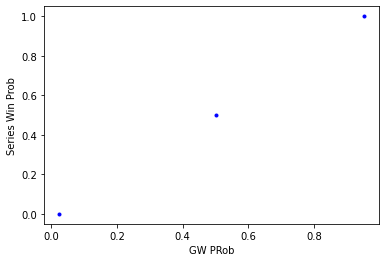

In [9]:
import torch
import matplotlib.pyplot as plt
import itertools

def win_series_prob(series, won, remaining, win_p):
    if(won == int((series / 2) + 1)):
        return 1.
    if((won + remaining) < int((series / 2) + 1)):
        return 0.
    win_next = win_p * win_series_prob(series, won + 1, remaining -1, win_p)
    lose_next = (1 - win_p) * win_series_prob(series, won, remaining -1, win_p)
    return win_next + lose_next
    

game_win_probs = (0.5, 0.95, 0.025)
series_win_probs = []
for p in game_win_probs:
    series_win_probs.append(win_series_prob(7, 0, 7, p))
    
print(series_win_probs)
    
    
plt.plot(game_win_probs, series_win_probs, 'b.')
plt.xlabel("GW PRob")
plt.ylabel('Series Win Prob')

Exercise 4. A and B play a series - part 2

Repeat the previous exercise, but now keep the probability that team A

wins fixed at p <- 0.75 and compute the probability for different series lengths. For example, wins in best of 1 game, 3 games, 5 games, and so on through a series that lasts 25 games.

Instructions
* Use the seq function to generate a list of odd numbers ranging from 1 to 25.
* Use the function sapply to compute the probability, call it Pr, of winning during series of different lengths.
    Then plot the result plot(N, Pr).



[0.75, 0.84375, 0.896484375, 0.929443359375, 0.9510726928710938, 0.965672492980957, 0.975709855556488, 0.9827001616358757, 0.9876152205979452, 0.9910967206960777, 0.9935772895159971, 0.9953531512848031, 0.9966295519311323]


Text(0, 0.5, 'Series Win Prob')

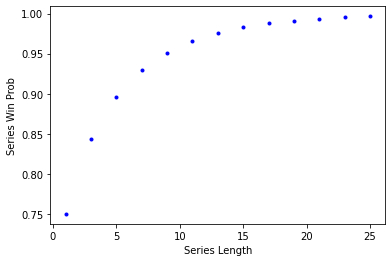

In [10]:
series_length = range(1,26,2)
series_win_probs = []
for s in series_length:
    series_win_probs.append(win_series_prob(s, 0, s, 0.75))
    
print(series_win_probs)
    
    
plt.plot(series_length, series_win_probs, 'b.')
plt.xlabel("Series Length")
plt.ylabel('Series Win Prob')